In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import pdgaTournamentPlotterFunctions as plotfuncts

# Load Data and Make Pandas Dataframe

Load scraped data that was saved to a `.json` file into a Pandas DataFrame.  Unideal features of the dataset:
*

Missing values:
* No PDGA # or rating
* Did not finish round and assigned '999'


In [22]:
dataPath = './tournament-data'

print(f'Available data sets (located in \'{dataPath}/\'):')
for d in os.listdir(dataPath):
    print(d)

Available data sets (located in './tournament-data/'):
pdgaEvent31742.json
pdgaEvent40638.json
pdgaEvent30718.json


In [3]:
# Select which dataset is to be examined
#eventID = 30718 # Delaware 2017
#eventID = 31742 # Paws and Claws 2017
eventID = 40638 # FISH Bowl 2021

eventURL = 'https://www.pdga.com/tour/event/' + str(eventID)

# Load data
eventInfo, eventData = plotfuncts.loadData(dataPath + '/pdgaEvent' + str(eventID) + '.json')
df = plotfuncts.makeDataFrame(eventData)

# Formatting Boilerplate

In [4]:
# Plot size standard
stdFigSize = [12, 8]

# Create a style guide for an arbitary number of lines:
markers = ['o','x','v','^','.']
colors = ['k','b','r','g','m']

legendList = ['Round ' + str(i+1) for i in range(eventInfo['nRounds'])]

# Exploratory Data Analysis


EVENT-URL:  Install jupyter extension

In [14]:
# Display tournament info
for key, val in eventInfo.items():
    print(f"{key+':':<20} {val}")

# Show some representative portions of the data
df.head(15)
df.tail(15)

Name:                Sellersville FISH Bowl
Date:                20-Jul-2019
Location:            Sellersville, Pennsylvania, United States
TD:                  Dustin Leatherman
nRounds:             2


,Name,PDGA#,Player Rating,Propagator,Score 1,Score 2,Rating 1,Rating 2
73,Lovell Bivins,104095.0,862.0,True,72,77,854.0,868.0
74,Kyle Watts,118247.0,840.0,True,69,81,884.0,834.0
75,Michael Berg,91988.0,873.0,True,68,84,893.0,809.0
76,Bob Zaffarano,NaN,NaN,True,70,82,871.0,824.0
77,Joshua Smith,94195.0,837.0,True,76,78,816.0,859.0
78,James Gutridge,105899.0,825.0,True,77,80,806.0,843.0
79,Brian Bochantin,48144.0,844.0,True,77,81,806.0,834.0
80,Andrew Zart,116630.0,885.0,True,79,81,787.0,834.0
81,Charlie Gutridge,105898.0,831.0,True,73,89,845.0,768.0
82,Michael Souders,59456.0,889.0,True,84,79,738.0,851.0


51 93


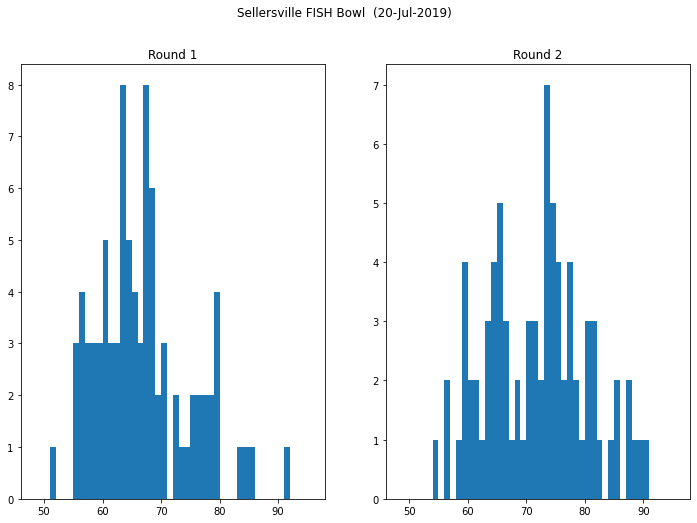

In [13]:
# Histogram of round scores (excluding '999' values)
fig, ax = plt.subplots(1, eventInfo['nRounds'], figsize = [12, 8])


# Compute min/max of all rounds for determining plot limits
minScore, maxScore = np.inf, 0

for n in range(eventInfo['nRounds']):
    colName = 'Score ' + str(n+1)
    vals = df.loc[df[colName] != 999][colName]
    maxScore = max(max(vals), maxScore)
    minScore = min(min(vals), minScore)
    
print(minScore, maxScore)
bins = np.arange(minScore, maxScore, 1)

for n in range(eventInfo['nRounds']):
    colName = 'Score ' + str(n+1)
    ax[n].hist(df.loc[df[colName] != 999][colName], bins=bins)
    ax[n].set_title('Round ' + str(n+1))
    ax[n].set_xlim(minScore - 5, maxScore + 5)

fig.suptitle(eventInfo['Name'] + '  (' + eventInfo['Date'] + ')')

plt.show()

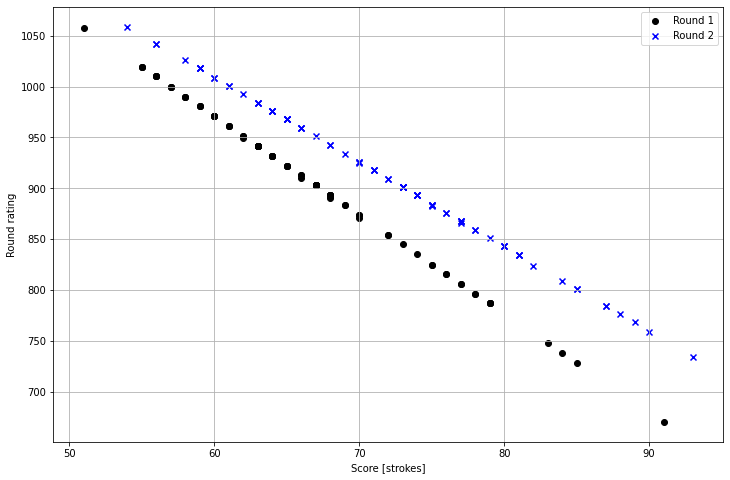

In [11]:
# Plot of round score vs round rating
fig, ax = plt.subplots(1, 1, figsize = stdFigSize)

for n in range(eventInfo['nRounds']):
    ax.scatter(df['Score ' + str(n+1)], df['Rating ' + str(n+1)], marker=markers[n], color=colors[n])
 
ax.set_xlabel('Score [strokes]')
ax.set_ylabel('Round rating')
ax.legend(legendList)
plt.grid()
plt.show()
    

If data from each round lies approximately colinearly in the above plot, indicates that same layout and rating scaling was used.  If round data lie on different lines, this is not true.

# Same score/different rating?!

In [ ]:
df['Score 1'].value_counts()

In [ ]:
df.loc[df['Score 2'] != 999]

# Issues:
* Is "IsPropagator" variable being scraped correctly?